# Wine clustering using KNN
This example uses KNN in order to clustering the Wine data set and then predict the origin of the wine based on 13 constituents found in each of the three types of wines. 
## Import necessary libs

In [1]:
import numpy as np  
import matplotlib.pyplot as plt  

## Load the Dataset

In [2]:
from sklearn import datasets
import pandas as pd

data = datasets.load_wine()
wine = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['target'])

wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
target                          178 non-null float64
dtypes: float64(14)
memory usage: 19.5 KB


In [3]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [4]:
wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


## Display some features relationship graphs

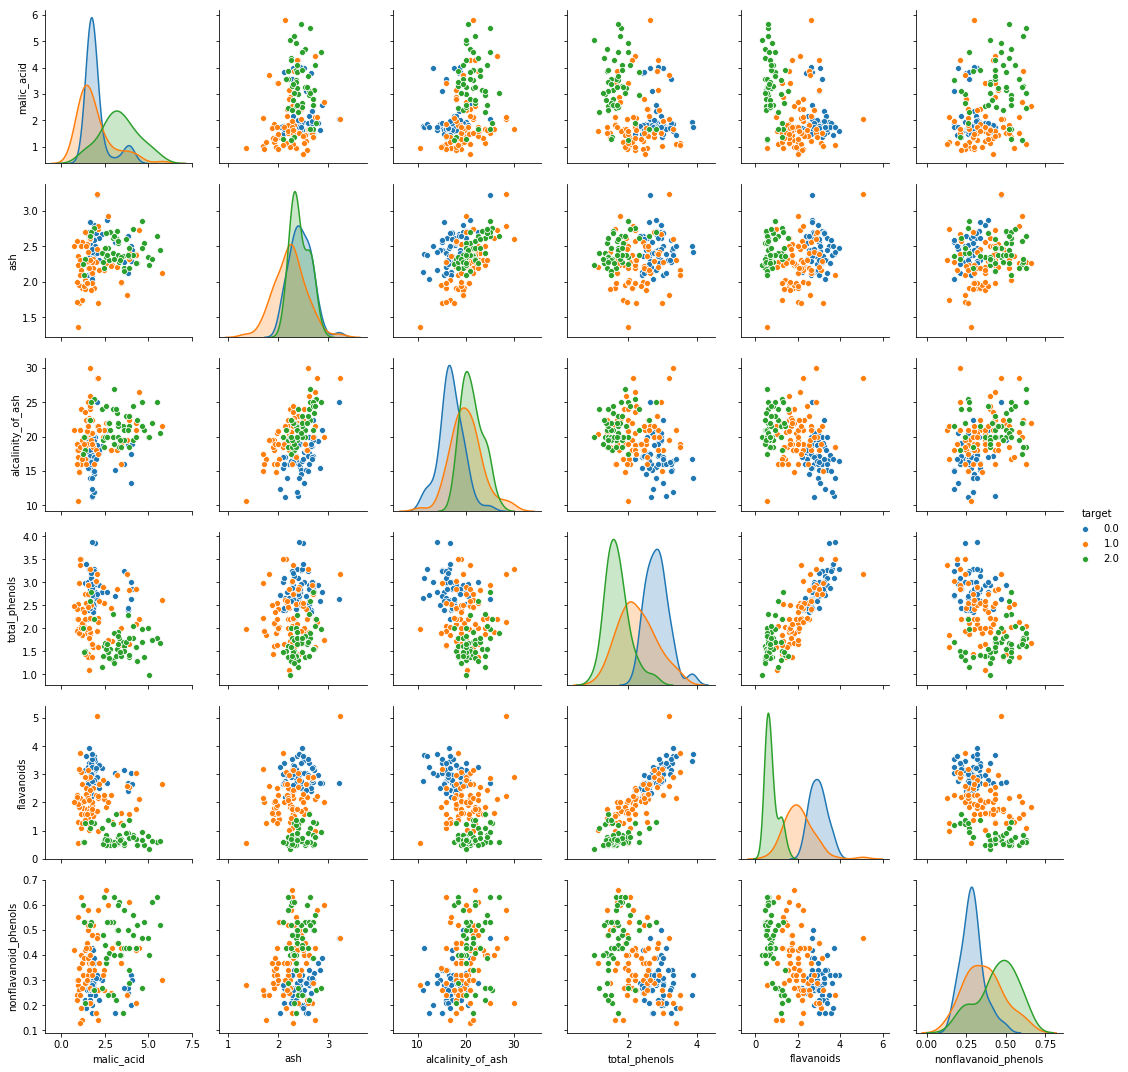

In [5]:
import seaborn as sns
sns.pairplot(wine, vars=["malic_acid", "ash", "alcalinity_of_ash", "total_phenols", "flavanoids", "nonflavanoid_phenols"], hue='target')

## Split the Dataset
Split the dataset into 80% trainning and 20% test examples

In [6]:
from sklearn.model_selection import train_test_split
X = wine[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']]
y = wine['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Pre-process the dataset
In order to have a normalized base

In [7]:
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

## Create the KNN Classifier
And predict the class of test base

In [8]:
from sklearn.neighbors import KNeighborsClassifier  

knn = KNeighborsClassifier(weights='distance', n_neighbors=1)  
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test)

## Evaluate the results
Plot the confusion matrix and the classification report (precision, recall, f1-score and the support)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

[[12  0  0]
 [ 0 14  2]
 [ 0  0  8]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      0.88      0.93        16
         2.0       0.80      1.00      0.89         8

   micro avg       0.94      0.94      0.94        36
   macro avg       0.93      0.96      0.94        36
weighted avg       0.96      0.94      0.95        36



## Evaluating the value of **K** (the number of neighbors to be considered)
We can use the train base and train many classifiers with different values of **K** in order to have an idea of what are the good values for **K**.

**Note**: this is an empirical evaluation highly dependent on the trainnig base, so some can have different results depending on the base and the split made.

Text(0,0.5,u'Error Rate')

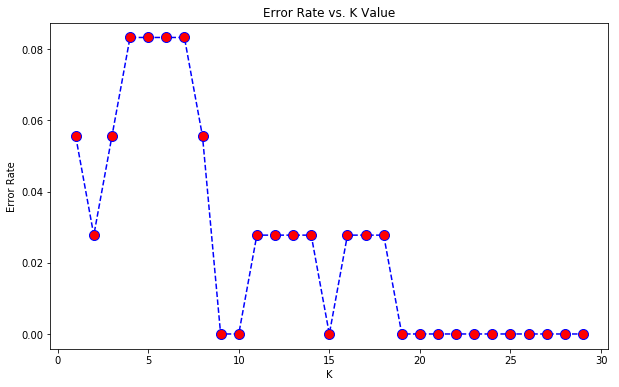

In [10]:
import matplotlib.pyplot as plt
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [14]:
from sklearn.neighbors import KNeighborsClassifier  

classifier = KNeighborsClassifier(n_neighbors=10)  
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[12  0  0]
 [ 0 16  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00        16
         2.0       1.00      1.00      1.00         8

   micro avg       1.00      1.00      1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



## Acknowledgements
- [UCI Wine Data Set](https://archive.ics.uci.edu/ml/datasets/Wine)